In [ ]:
! git clone https://github.com/udacity/CarND-Camera-Calibration.git

fatal: destination path 'CarND-Camera-Calibration' already exists and is not an empty directory.


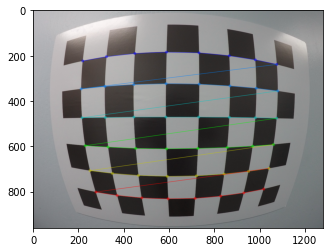

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# prepare object points
nx = 8 #TODO: enter the number of inside corners in x
ny = 6 #TODO: enter the number of inside corners in y

# Make a list of calibration images
fname = '/content/CarND-Camera-Calibration/calibration_wide/GOPR0035.jpg'
img = cv2.imread(fname)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)


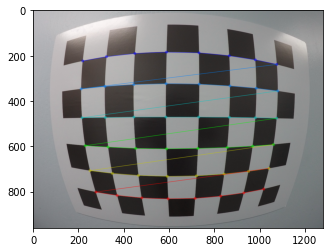

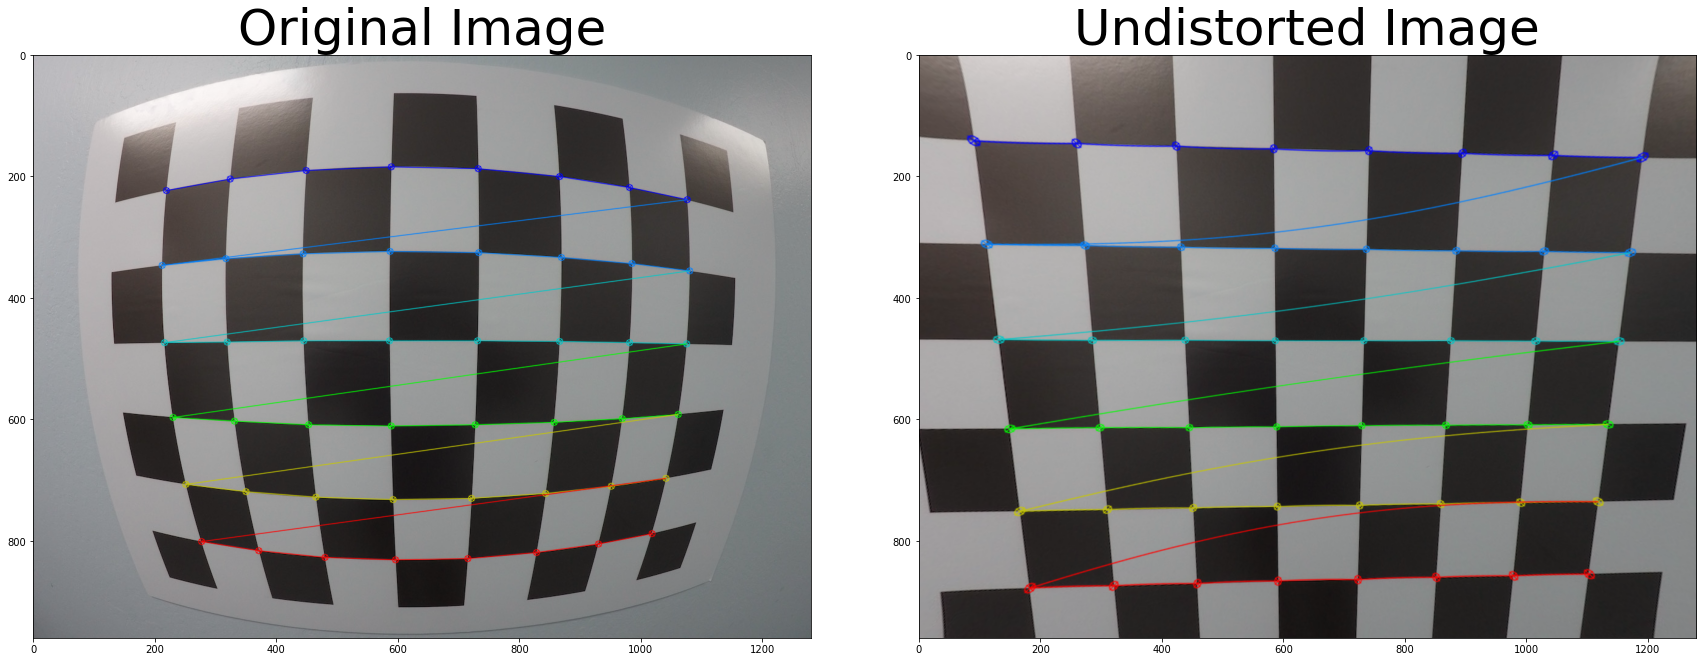

In [ ]:
import glob
import os
from skimage import io
images = glob.glob('/content/CarND-Camera-Calibration/calibration_wide/GOPR00*.jpg')
parent = '/content/CarND-Camera-Calibration/calibration_wide/'


objpoints = []
imgpoints = []

#Prepare objpoints
objp = np.zeros((6*8,3), np.float32)
objp [:,:2] = np.mgrid[0:8,0:6].T.reshape(-1, 2) #x, y coordinates

def cal_undistort(img, objpoints, imgpoints):
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)
    
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
    
    img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
    plt.imshow(img)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

#count = 0
#for fname in images:
img = cv2.imread(fname)
undistorted = cal_undistort(img, objpoints, imgpoints)
#  count = +1


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

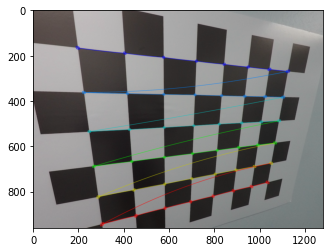

In [ ]:
count = 0
for fname in images:
  img = cv2.imread(fname)
  undistorted = cal_undistort(img, objpoints, imgpoints)
  plt.imshow(undistorted)
  count = +1

In [ ]:
def warp(img):
  img_size = (img.shape[1], img.shape[0])

  # Four source coordinates:
  src = np.float32(
      [[364, 58],
      [1065, 215],
      [378, 854],
      [1059, 691]])
  dest = np.float32(
      [[0,0],
      [1280, 0],
      [0, 960],
      [1280, 960]])
  
  # Compute perspective transform matrix
  M = cv2.getPerspectiveTransform(src, dest)

  # Compute inverted perspective transform matrix
  Minv = cv2.getPerspectiveTransform(dest, src)

  warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
  return warped



(960, 1280, 3)

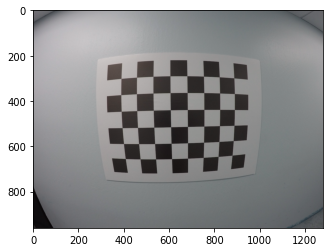

In [ ]:
im = cv2.imread('/content/CarND-Camera-Calibration/calibration_wide/GOPR0042.jpg')
plt.imshow(im)
im.shape

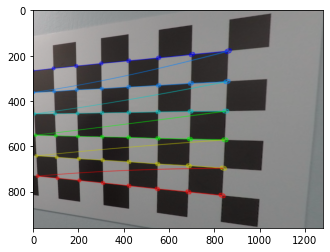

In [ ]:
undistorted = cal_undistort(im, objpoints, imgpoints)
warped = warp(undistorted)
plt.imshow(warped)

In [ ]:
! git clone https://github.com/udacity/CarND-LaneLines-P1.git

Cloning into 'CarND-LaneLines-P1'...
remote: Enumerating objects: 254, done.
remote: Total 254 (delta 0), reused 0 (delta 0), pack-reused 254
Receiving objects: 100% (254/254), 43.44 MiB | 28.32 MiB/s, done.
Resolving deltas: 100% (121/121), done.


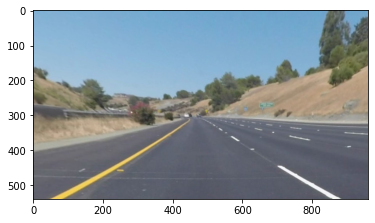

In [ ]:
image = mpimg.imread('/content/CarND-LaneLines-P1/test_images/solidYellowCurve2.jpg')
undistorted = cal_undistort(image, objpoints, imgpoints)
warped = warp(undistorted)
plt.imshow(undistorted)

In [ ]:
def warp2(img):
  img_size = (img.shape[1], img.shape[0])
  rows, cols = image.shape[:2]

  # Four source coordinates:
  src = np.float32(
      [[cols*0.15, rows*1],
      [cols*0.5, rows*0.5],
      [cols*0.9, rows*1],
      [cols*0.52, rows*0.5] ])
  dest = np.float32(
      [[cols*0, rows*1],
      [cols*0, rows*0],
      [cols*1, rows*1],
      [cols*1, rows*0]])
  
  # Compute perspective transform matrix
  M = cv2.getPerspectiveTransform(src, dest)

  # Compute inverted perspective transform matrix
  Minv = cv2.getPerspectiveTransform(dest, src)

  warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
  return warped

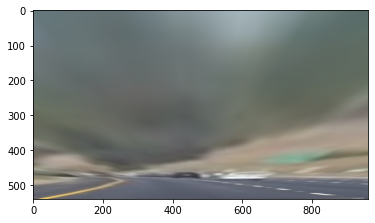

In [ ]:
rows, cols = image.shape[:2]
bottom_left  = [cols*0.15, rows*1]
top_left     = [cols*0.5, rows*0.5]
bottom_right = [cols*0.9, rows*1]
top_right    = [cols*0.52, rows*0.5] 
image = mpimg.imread('/content/CarND-LaneLines-P1/test_images/solidYellowCurve.jpg')
undistorted = cal_undistort(image, objpoints, imgpoints)
warped = warp2(image)
plt.imshow(warped)